# Introduction

Predicting Customer Lifetime Value (CLV) is crucial for e-commerce businesses seeking to estimate the total
revenue generated from a single customer account over its entire lifespan. My project aims to develop a predictive
model for CLV that captures and forecasts the net profit associated with the complete future relationship with
customers. This model is essential for optimizing marketing strategies, enhancing customer retention, and efficiently
allocating resources to the most promising customer segments.

# Dataset and Preliminary Examination

To achieve this goal, I make use of the "Online Retail II" dataset available from the UCI Machine Learning Repository. This dataset provides a detailed record of transactions made by a UK-based online retailer spanning from December 2009 to December 2011. It includes valuable information such as Customer IDs, Invoice Numbers, Stock Codes, Descriptions, and more, offering a rich source for analyzing customer buying behaviors and building CLV models.

# Problem Significance

Predicting CLV well is a big deal in e-commerce. It helps find the best customers and plan how to sell more to them. This means smarter marketing and happier customers, leading to more profit from marketing efforts.

# Modeling Approach and Hypotheses

Based on thorough data examination and understanding CLV dynamics, I propose the following initial hypotheses:
- There's likely a positive correlation between purchase frequency and CLV, implying that customers who buy more often tend to have higher lifetime values.
- The total amount spent by customers probably correlates strongly with CLV, suggesting that higher-spending customers likely have higher lifetime values.
- Seasonal trends and product categories might influence customer spending behaviors, potentially affecting their CLV.

These hypotheses guide our exploratory data analysis and modeling approach. We'll start with a basic Linear Regression model and advance to more complex algorithms like Decision Trees, Random Forests, Gradient Boosting, and Neural Networks (Multilayer Perceptrons). Each model will be thoroughly evaluated to gauge its accuracy in predicting CLV, allowing us to refine our methods continuously.

# Conclusion and Forward-Look

The core objective of my project is to provide an evidence-based CLV prediction model, empowering e-commerce 
enterprises with precise insights for decision-making. By grasping customer worth, I intend to guide marketing
tactics and customer relations toward more lucrative paths. As market dynamics shift and new data emerges, my
plan involves iteratively refining the model to uphold its accuracy and relevance in an ever-changing business
environment.

# Exploratory Data Analysis

In [18]:
import pandas as pd
import numpy as np
data = pd.read_excel('online_retail_II.xlsx', engine='openpyxl')

In [19]:
data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [20]:
data.describe(include='all')  

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,NaN,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,NaN,NaN,NaN,485852
mean,NaN,NaN,NaN,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478,NaN
min,NaN,NaN,NaN,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2010-03-21 12:20:00,1.250000,13983.000000,NaN
50%,NaN,NaN,NaN,3.000000,2010-07-06 09:51:00,2.100000,15311.000000,NaN
75%,NaN,NaN,NaN,10.000000,2010-10-15 12:45:00,4.210000,16799.000000,NaN
max,NaN,NaN,NaN,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,NaN


In [21]:
dataset_structure = data.info() #printing important information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [22]:
missing_values = data.isnull().sum() #Identifying missing values
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [23]:
# Remove rows with missing descriptions
data_cleaned = data.dropna(subset=['Description'])
# Replace missing customer IDs with a placeholder
data_cleaned = data.dropna(subset=['Customer ID'])

In [24]:
missing_values = data_cleaned.isnull().sum() #Identifying missing values after data celaning
print(missing_values)

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [25]:
#saving the cleaned file as CSV to make it easy to use
data_cleaned.to_csv('cleaned_online_retail_II.csv', index=False) 

# Univariate Analysis of Quantitative Features

### Analyzing 'Quantity'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

Before applying IQR Filter
0         12
1         12
2         12
3         48
4         24
          ..
525456     2
525457     1
525458     1
525459     2
525460     2
Name: Quantity, Length: 417534, dtype: int64


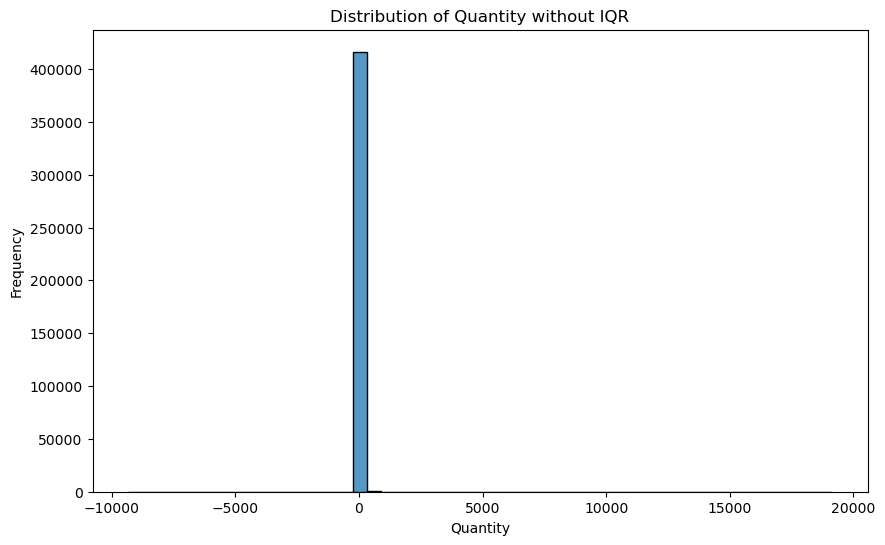

Unfiltered quantity description
 count    417534.000000
mean         12.758815
std         101.220424
min       -9360.000000
25%           2.000000
50%           4.000000
75%          12.000000
max       19152.000000
Name: Quantity, dtype: float64

After applying IQR Filter
0         12
1         12
2         12
4         24
5         24
          ..
525456     2
525457     1
525458     1
525459     2
525460     2
Name: Quantity, Length: 390149, dtype: int64


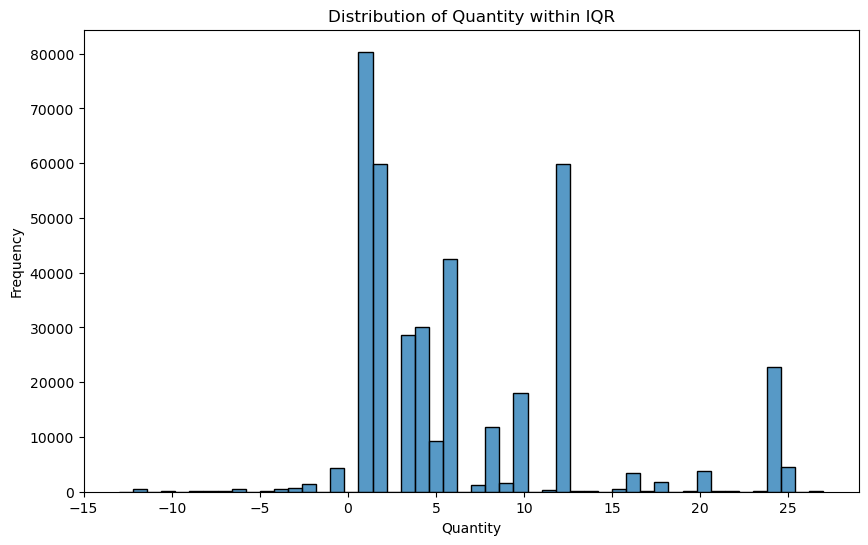

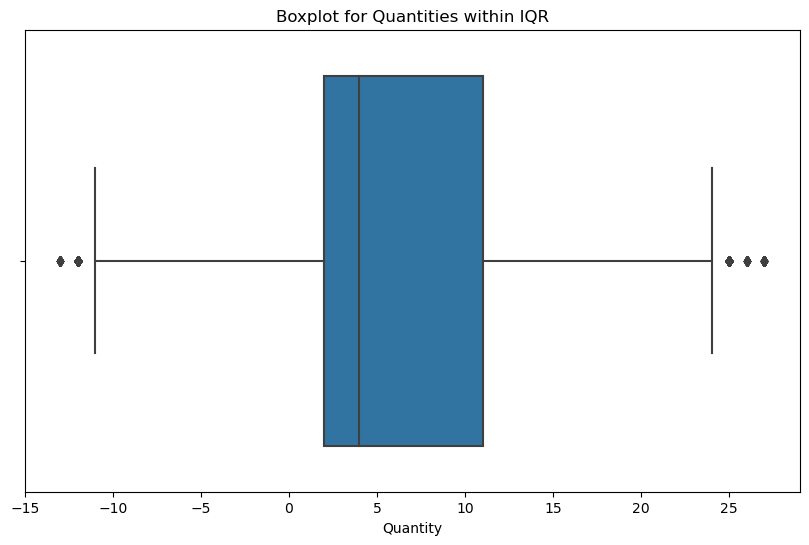

Filtered quantity description
 count    390149.000000
mean          6.523538
std           6.616450
min         -13.000000
25%           2.000000
50%           4.000000
75%          11.000000
max          27.000000
Name: Quantity, dtype: float64


In [27]:
# Filtering extreme outliers for visualization purpose
# we will use the interquartile range (IQR) to filter extreme outliers.
Q1 = data_cleaned['Quantity'].quantile(0.25)
Q3 = data_cleaned['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what we'll consider as acceptable values (this is arbitrary and can be adjusted)
lower_bound = Q1 - 1.5 * IQR   #in this case lower bound  is -13.0
upper_bound = Q3 + 1.5 * IQR   #in this case lower bound  is 27.0  

# Filter the data within the interquartile range for visualization
filtered_quantities = data_cleaned[(data_cleaned['Quantity'] >= lower_bound) & (data_cleaned['Quantity'] <= upper_bound)]['Quantity']
print('Before applying IQR Filter')
print(data_cleaned['Quantity'])

# Now let's plot the histogram before filtering the outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Quantity'], bins=50, kde=False)
plt.title('Distribution of Quantity without IQR')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

# Summary Statistics for the filtered Quantity data
unfiltered_quantity_description = data_cleaned['Quantity'].describe()
print('Unfiltered quantity description\n', unfiltered_quantity_description)

print('\nAfter applying IQR Filter')
print(filtered_quantities)

# Plotting histogram for filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_quantities, bins=50, kde=False)
plt.title('Distribution of Quantity within IQR')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

#Let's do boxplot to undertand the data more
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_quantities)
plt.title('Boxplot for Quantities within IQR')
plt.xlabel('Quantity')
plt.show()

# Summary Statistics for the filtered Quantity data
filtered_quantity_description = filtered_quantities.describe()
print('Filtered quantity description\n', filtered_quantity_description)

Looking at the histogram, we notice that the most common number of items people buy in transactions is between 0 and 10,
with a big group of transactions where around 4 items are purchased. This matches what we see when we look at the summary
statistics and the middle value (median) in the data. The median tells us that half of the transactions involve buying 4
items or less. So, overall, it seems like 4 items per purchase is a pretty typical amount.

The boxplot adds more insight by showing how the data spreads out within the middle 50% range, called the interquartile
range (IQR). The box in the plot covers this middle 50% of the data, with a line inside representing the median, which
matches the median value we see in the summary statistics. The lines (whiskers) extending from the box go up to 1.5 times
the IQR above the upper quartile and down to 1.5 times the IQR below the lower quartile. Some dots outside these whiskers
represent outliers, which are values beyond the typical range but still within certain limits I've set for visualization.

It's noteworthy that there are negative quantities in the dataset, which might suggest returned items, order cancellations,
or data entry mistakes. Exploring the context behind these negative values could be valuable to understand their reasons
more deeply.

### Analyzing 'Price'


Unfiltered Price description
 count    417534.000000
mean          3.887547
std          71.131797
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       25111.090000
Name: Price, dtype: float64


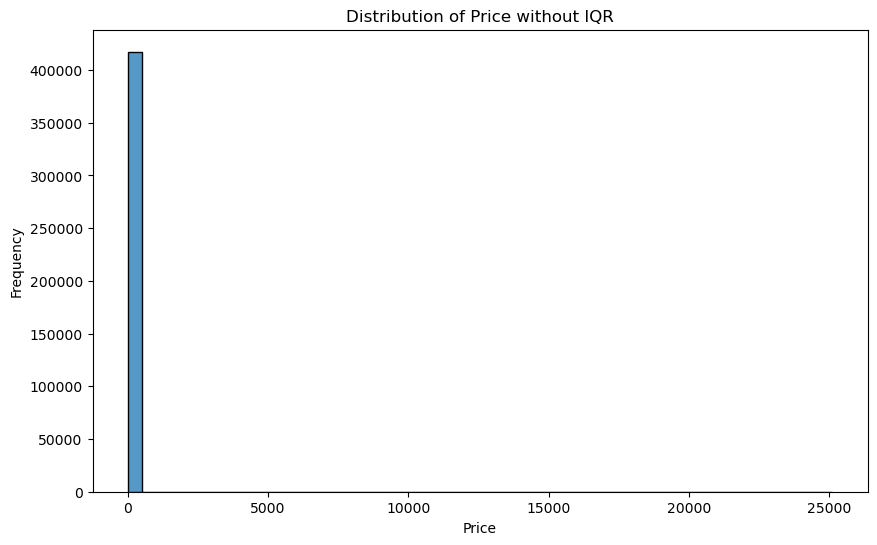


After applying IQR Filter


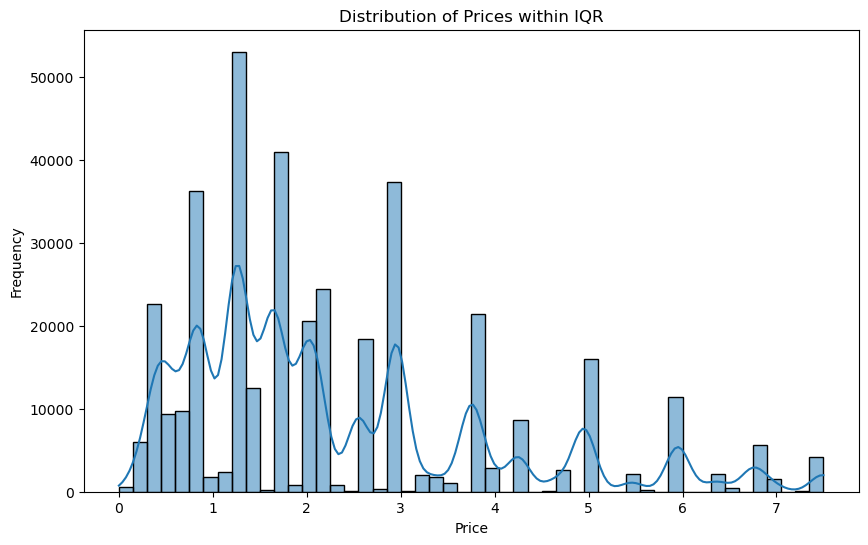

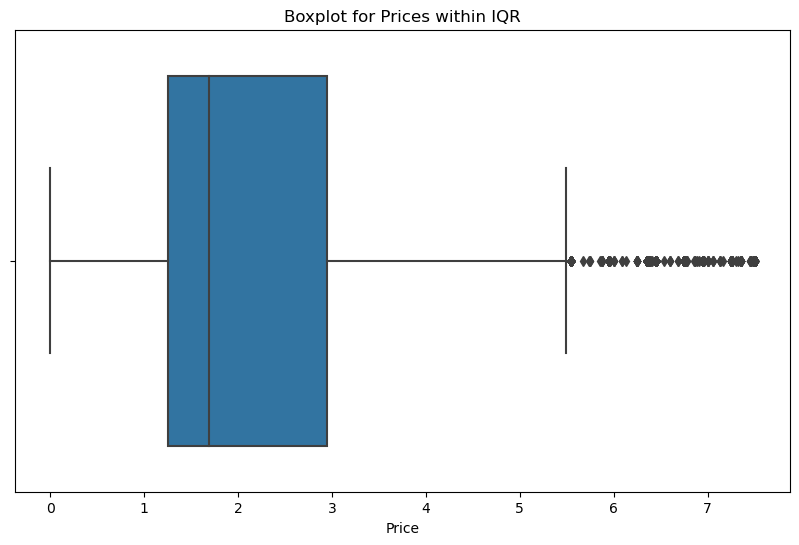

count    382461.000000
mean          2.294439
std           1.656923
min           0.000000
25%           1.250000
50%           1.690000
75%           2.950000
max           7.500000
Name: Price, dtype: float64


In [28]:
# Filter out extreme price outliers for visualization purposes using the interquartile range (IQR)
Q1_price = data_cleaned['Price'].quantile(0.25)
Q3_price = data_cleaned['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price #in this case lower bound  is -2.5
upper_bound_price = Q3_price + 1.5 * IQR_price #in this case upper bound  is 7.5
filtered_prices = data_cleaned[(data_cleaned['Price'] >= lower_bound_price) & (data_cleaned['Price'] <= upper_bound_price)]['Price']

# Summary Statistics for the filtered Quantity data
unfiltered_price_description = data_cleaned['Price'].describe()
print('\nUnfiltered Price description\n', unfiltered_price_description)

# Now let's plot the histogram before filtering the outliers
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Price'], bins=50, kde=False)
plt.title('Distribution of Price without IQR')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


print('\nAfter applying IQR Filter')

# Plotting histogram for filtered data
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=50, kde=True)
plt.title('Distribution of Prices within IQR')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for the filtered Price data
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_prices)
plt.title('Boxplot for Prices within IQR')
plt.show()

# Summary Statistics for the filtered Price data
filtered_price_description = filtered_prices.describe()
print(filtered_price_description)

The histogram displays how prices are spread out, showing that some prices are more popular than others. Most items
are priced at less than 3 currency units, with a lot of prices repeating at certain intervals, like 0.99 or 1.99.
These repeating prices suggest a pricing strategy. Having different peaks in the histogram means that the pricing
strategy includes many different prices, maybe to appeal to different types of customers or because there's a wide
range of products.

The boxplot zooms in on the middle half of the data, which spans from 1.25 to 2.95 currency units, according to where
the 25th and 75th percentiles lie. The middle line in the box marks the median price, which is 1.69, matching what we
saw in the summary stats. The lines (whiskers) stretch to include most of the data, except for the outliers, which are
shown as individual dots outside these lines. These outliers indicate that while most prices are lower, there are some
items priced higher, going up to 7.5 currency units. This might mean there are premium options available or items sold 
in larger quantities.

Putting the visuals and summary stats together, we see that most products are priced low, suggesting the store focuses
on affordable items. They also have some higher-priced items. The prices often end in round numbers, which might be a
tactic to make customers feel like they're getting a good deal.

# Univariate Analysis of Categorical Features

### Analyzing 'StockCode'

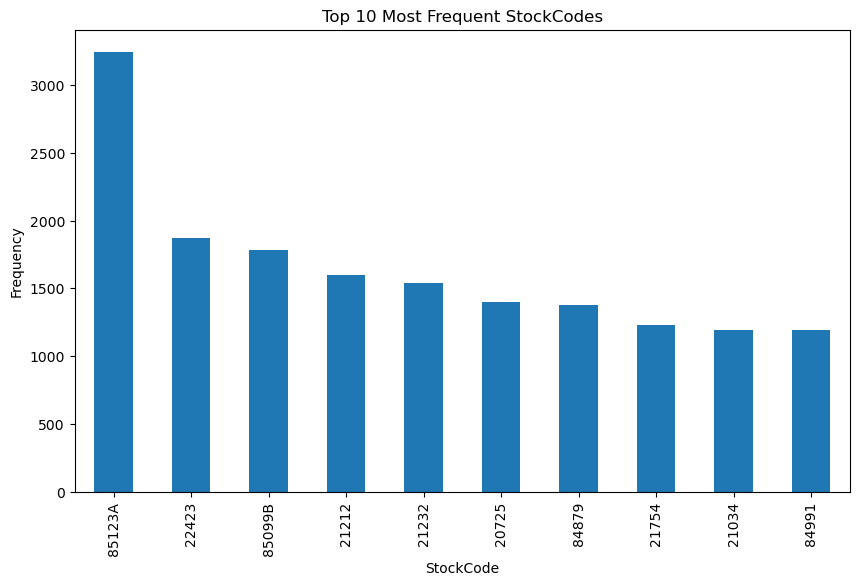

In [29]:
# Top 10 Most Frequent StockCodes
plt.figure(figsize=(10, 6))
data_cleaned['StockCode'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent StockCodes')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.show()

The bar chart shows the top 10 most common items or categories sold in the retail business.
- The tallest bar represents the item with StockCode '85123A', which is the most frequently sold item by a large margin.
- The number of sales decreases gradually from the most common item to the tenth most common, indicating that only a few items are very popular.
- This pattern suggests that a small number of products are responsible for a big part of the sales, which is common in retail where a few items sell much more than others.
- Knowing which items are top sellers can help businesses manage inventory, plan marketing strategies, and predict future sales.
- StockCodes are like ID numbers for products. In real business, these would be matched with product descriptions to understand which specific products are selling well. This information is useful for managing stock, understanding customer preferences, and planning promotions to increase sales.

### Analyzing 'Description'

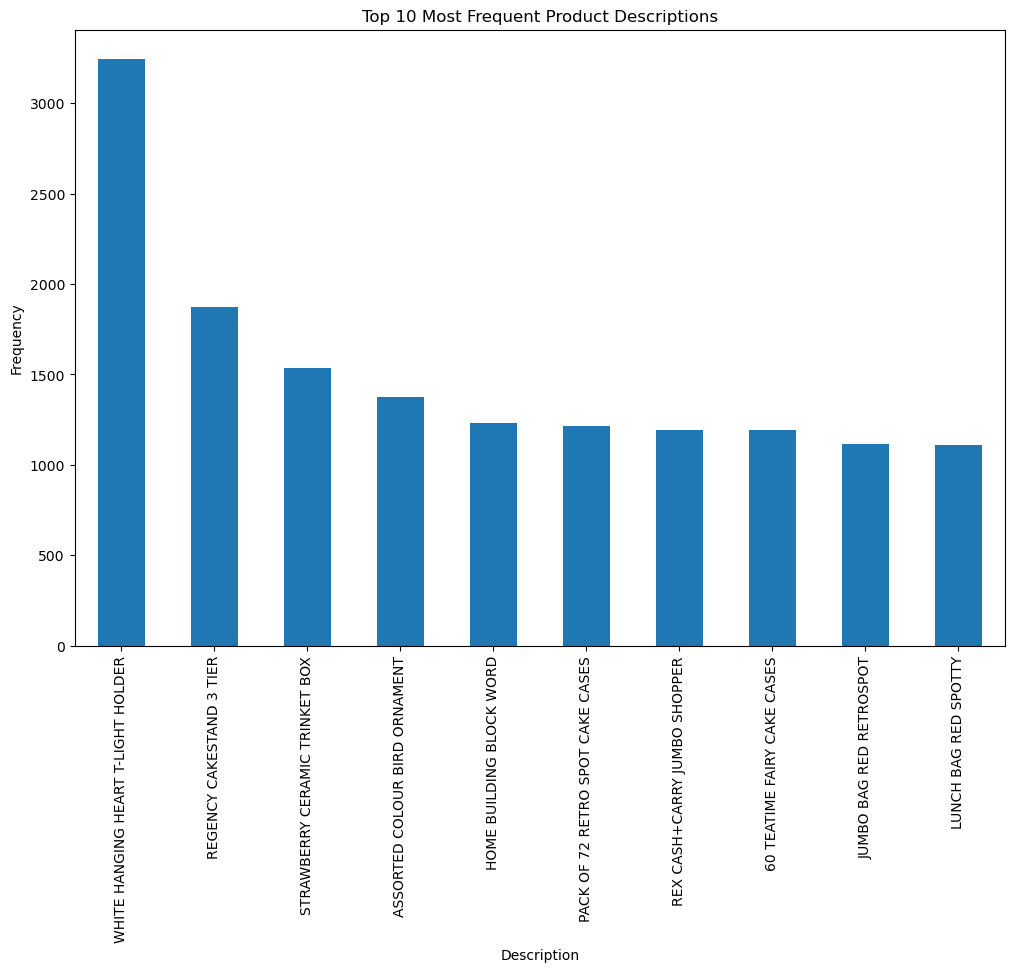

In [30]:
# Top 10 Most Frequent Descriptions
plt.figure(figsize=(12, 8))
data_cleaned['Description'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Frequent Product Descriptions')
plt.xlabel('Description')
plt.ylabel('Frequency')
plt.show()

The bar chart highlights the top 10 most frequently purchased product descriptions, revealing the most popular items
among customers.

Key observations:
- The 'WHITE HANGING HEART T-LIGHT HOLDER' stands out as the most popular product by a significant margin, indicating
it may be a flagship item or a customer favorite.
- The remaining items exhibit a more even frequency distribution, but all fall considerably short of the top item.
- This chart provides valuable insights into the performance of the product mix, emphasizing items that could be
central to sales strategies such as upselling, cross-selling, and promotions.
- The diversity of items in the top 10 suggests a varied range of popular products, possibly reflecting a broad
customer base with diverse interests or seasonal purchasing patterns.
- For inventory management, these insights can ensure that popular items are well-stocked to meet customer demand.
- For marketing strategies, these products could be highlighted in advertising campaigns or used to attract customers
through discounts and promotions.

Understanding the popularity of these items could also prompt the exploration of similar products to expand the 
offering and capitalize on demonstrated consumer interest. Leveraging this data is crucial for optimizing the product
portfolio and enhancing customer satisfaction in the retail business.

### Analyzing 'Country'

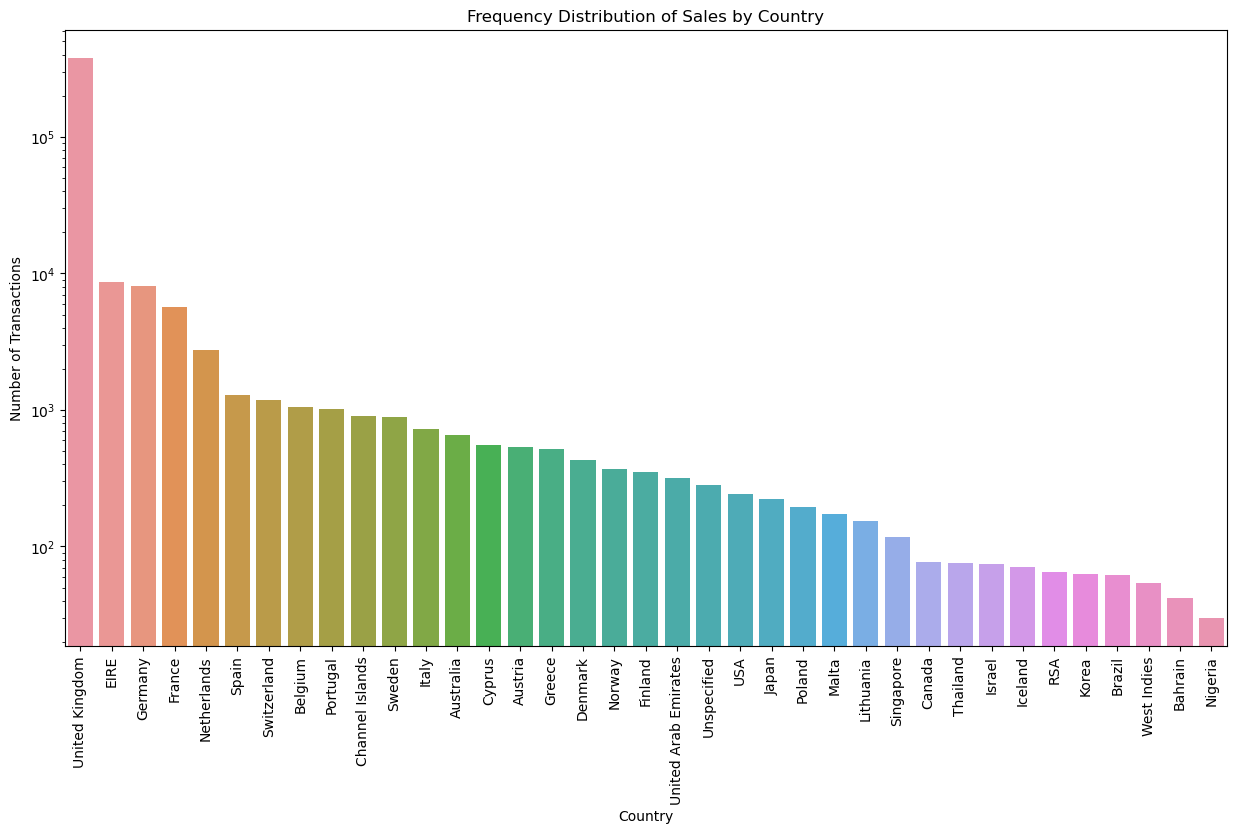

In [31]:
plt.figure(figsize=(15, 8))  # Increase figure size
country_counts = data_cleaned['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values) 
plt.title('Frequency Distribution of Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xticks(rotation=90)  # Rotate x-axis labels to prevent overlap
plt.show()

### The visual representation illustrates a logarithmic distribution of sales transactions across various countries.

Interpretation:

- The United Kingdom leads with the highest number of transactions, indicating that the business's primary market is there.
This dominance may stem from the business being based in the UK or having a stronger brand presence and customer base.
- EIRE, Germany, and France follow as the next significant markets, showing a solid foothold in these regions. 
These countries could be key growth areas or stable markets with loyal customers.
There is a notable drop in transaction numbers as we move to other countries, indicating a long tail of 
international sales.
- Countries towards the end of the chart, such as Brazil and Nigeria, have significantly fewer transactions,
suggesting potential markets for expansion or areas where the business is still establishing its presence.
- The logarithmic scale highlights the disparity in transaction numbers between the UK and other countries,
underscoring the need for market-specific strategies.
- The gradient of colors from red to pink signifies the descending order of transaction volumes, visually reinforcing
the data's hierarchy and making it easier to discern the distribution pattern.
- The data suggests that tailored market strategies could be beneficial, focusing on customer acquisition and
retention in the UK while exploring expansion opportunities in countries with lower transaction volumes. It's crucial to consider cultural, economic, and logistical factors when planning for international growth based on this transaction distribution.

### Bivariate/Multivariate Analysis

#### Correlation Analysis

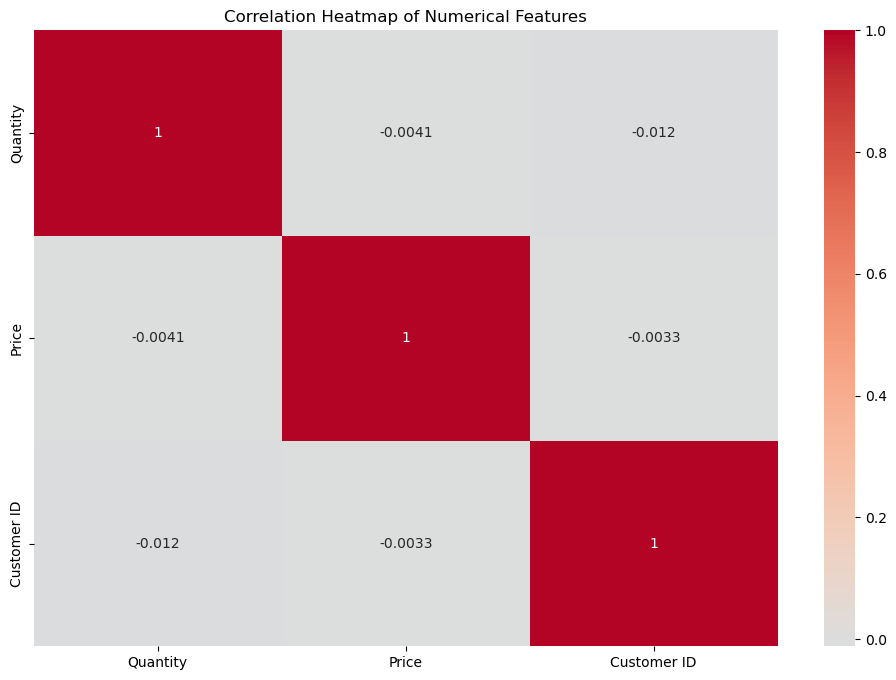

In [33]:
# Select only numerical columns
numerical_data = data_cleaned.select_dtypes(include=[float, int])

# Calculate the correlation matrix for the numerical features
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

This correlation heatmap provides a visual summary of the relationships between the numerical features 
'Quantity', 'Price', and 'Customer ID'.

Interpretation:
- The diagonal, marked with a correlation coefficient of 1, indicates a perfect correlation with itself, which is expected.
- The correlation between 'Quantity' and 'Price' is very close to zero, suggesting no linear relationship. This implies
that the quantity of products purchased does not significantly increase or decrease with changes in price within this
dataset.
- Similarly, the correlation between 'Quantity' and 'Customer ID' is negligible, indicating that the quantity purchased
is not significantly linked to specific customers.
- The correlation between 'Price' and 'Customer ID' is minimal, suggesting that a customer's identity does not 
determine the prices of the products they purchase.
- The near-zero values across the board suggest that within the scope of this data, there is no strong linear dependency
between these variables. This could indicate that customers' purchasing patterns are varied and not particularly
influenced by price changes, or that the dataset is diverse and not dominated by any specific customer behavior trend.

### Comparative Analysis

#### Top-Selling Products

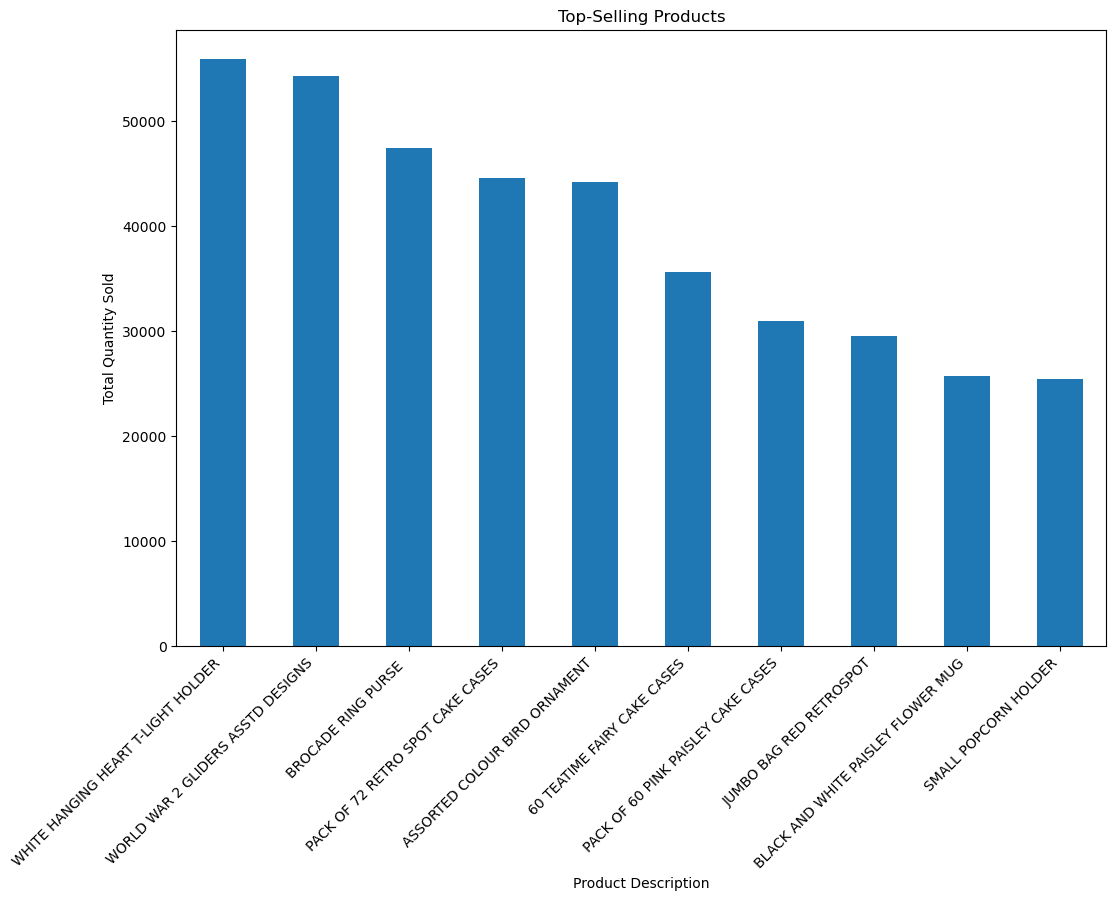

In [37]:
#Group by 'Description' and sum 'Quantity' to find top-selling products
top_selling_products = data_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

#Bar plot of top-selling products
plt.figure(figsize=(12, 8))
top_selling_products.plot(kind='bar')
plt.title('Top-Selling Products')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart showcases the top-selling products based on the total quantity sold, offering a clear visual 
representation of the most popular items among customers.

Interpretation:
- The 'WHITE HANGING HEART T-LIGHT HOLDER' is the top-selling product, with the highest total quantity sold, 
highlighting its popularity or significant role in sales promotions.
- 'WORLD WAR 2 GLIDERS ASSORTED DESIGNS' and 'BROCADE RING PURSE' follow closely in sales, indicating they may
be staple items or part of successful marketing campaigns.
- Other products, such as 'PACK OF 72 RETROSPOT CAKE CASES', 'ASSORTED COLOUR BIRD ORNAMENT', 'PACK OF 60 TEATIME PAPER/
FOIL CAKE CASES', 'JUMBO BAG RED RETROSPOT', 'BLACK AND WHITE PAISLEY FLOWER MUG', and 'SMALL POPCORN HOLDER', also
show substantial sales, rounding out the top sellers.
- This chart is a valuable tool for inventory management, offering insights into which products may need more frequent
restocking and which could be leveraged for upselling or cross-selling opportunities. It also aids in strategic 
decision-making about which products to feature in marketing materials or promotions to drive sales.

#### Most Active Customer Segments

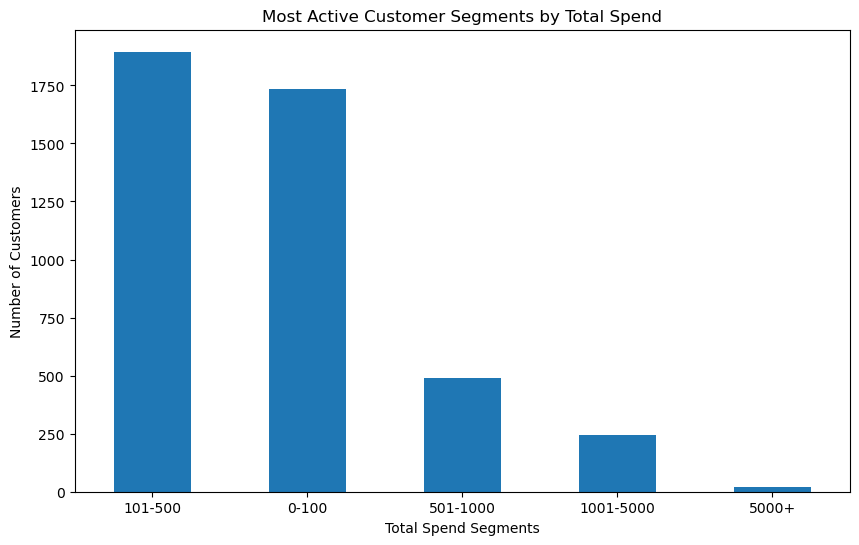

In [38]:
# Group by 'Customer ID' and sum 'Price' to find total spend per customer
customer_total_spend = data_cleaned.groupby('Customer ID')['Price'].sum().sort_values(ascending=False)

# Create customer segments based on total spend
bins = [0, 100, 500, 1000, 5000, customer_total_spend.max()]
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5000+']
customer_segments = pd.cut(customer_total_spend, bins=bins, labels=labels)

# Bar plot of customer segments
plt.figure(figsize=(10, 6))
customer_segments.value_counts().plot(kind='bar')
plt.title('Most Active Customer Segments by Total Spend')
plt.xlabel('Total Spend Segments')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

The bar chart categorizes customers into segments based on their total spend and displays the number of customers 
in each segment. This visualization is particularly useful for understanding the distribution of customer spending
and identifying the most active customer segments.

Interpretation:
- The largest customer segments are in the lower spending categories of '101-500' and '0-100', indicating a substantial 
customer base making smaller purchases. This suggests that the business appeals to customers with lower spending power
or that these customers make frequent but small purchases.
- The '501-1000' segment has fewer customers, showing a decline as the spending requirement increases. While there
are loyal customers in this segment, their numbers are significantly less than those spending under 500.
- The '1001-5000' and '5000+' segments have even fewer customers, which is typical as higher spending levels are
less common. However, these customers likely represent a high-value segment due to their significant contribution
to revenue despite their smaller numbers.
- This segmentation allows a business to tailor marketing strategies and customer relationship management appropriately.
For instance, loyalty programs or targeted promotions could be designed to move customers from the '0-100' segment to
higher spending segments. Similarly, exclusive offers or premium services could be provided to the '5000+' segment to
maintain their high engagement levels.
- The data also suggests opportunities for upselling and cross-selling, especially in the lower spending segments.
By analyzing purchase patterns within these segments, the business can identify popular products and develop bundles
or incentives that encourage higher average spends.
- Furthermore, the dominance of the '101-500' and '0-100' segments indicates the potential to convert one-time buyers
or those with smaller basket sizes into repeat customers with a higher lifetime value.

### Advanced Visual Analytics

#### Violin Plot for Quantity by Country:

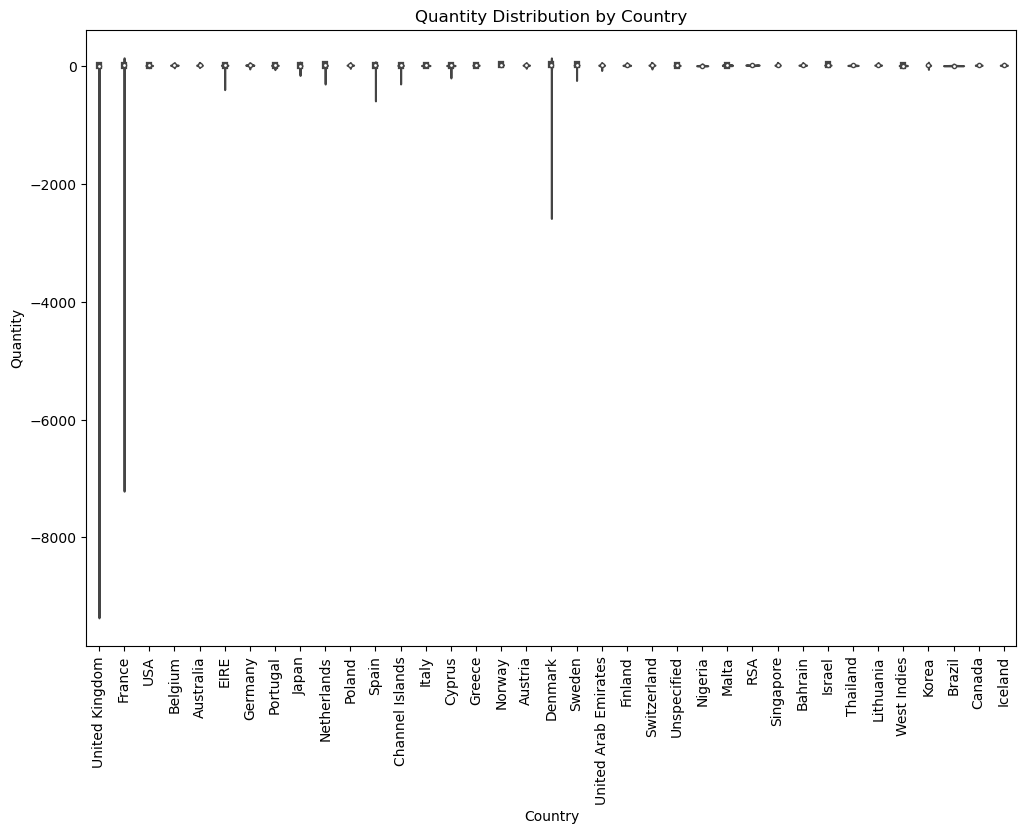

In [39]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Country', y='Quantity', data=data_cleaned[data_cleaned['Quantity'] < 50])  # Limiting to reasonable quantities
plt.title('Quantity Distribution by Country')
plt.xticks(rotation=90)
plt.show()